In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

## Making Predictions for pLac, Low, Med, High, Neg, P5, P533A, OsmY, and OsmY_C13A

Notes:
* Descriminator overlaps with ITR
* Need ITR

Lengths:
* UP = 16bp
* -35 = 6bp
* spacer = 17bp (or as noted in pdf)
* -10 = 6bp
* Disc = 8bp
* ITR = 20bp

In [305]:
def format(seq):
    return seq.upper().replace(' ', '')

In [306]:
seqs = {
         'pLac' : ['CTAGAGGTCTTCCGAC', 'TTTACA', 'CTTTATGCTTCCGGCTCG', 'TATGTT', 'GTGTGGGC', 'GGGAAGACAACTAGGGGCCC'],
          'Low' : ['CTAGAGGTCTTCCGAC', 'TTGACA', 'CTATTTCCTATTTCTCT', 'TATAAT', 'TTGTGTTG', 'CGGGAAGACAACTAGGGGCC'],
          'Med' : ['CTAGAGGTCTTCCGAC', 'AAGACG', 'CTATTTCCTATTTCTCT', 'TATAAT', 'TTGTGTTG', 'CGGGAAGACAACTAGGGGCC'],
         'High' : ['CTAGAGGTCTTCCGAC', 'CCCCTA', 'TTTCCTATTTCTGTA', 'GTCATA', 'GGGTGTTG', 'CGGGAAGACAACTAGGGGCC'],
        #   'Neg' : ['', '', '', '', '', ''],
           'P5' : ['CTAGAGGTCTTCCGAC', 'TTGACA', 'ATTAATCATCCGGCTCG', 'TAATTT', 'ATGTGGAG', 'CGGGAAGACAACTAGGGGCC'],
        'P533A' : ['CTAGAGGTCTTCCGAC', 'TTAACA', 'ATTAATCATCCGGCTCG', 'TAATTT', 'ATGTGGAG', 'CGGGAAGACAACTAGGGGCC'],
         'OsmY' : ['AGAGGTCTTCCGACCC', 'CGAGCG', 'GTTTCAAAATTGTGATC', 'TATATT', 'TAACAAAG', 'CGGGAAGACAACTAGGGGCC'],
    'OsmY_C13A' : ['AGAGGTCTTCCGACCC', 'CGAGCG', 'GTTTCAAAATTGTGATA', 'TATATT', 'TAACAAAG', 'CGGGAAGACAACTAGGGGCC'],
}

In [307]:
X = pd.DataFrame(seqs).T
X.head(None)

,0,1,2,3,4,5
pLac,CTAGAGGTCTTCCGAC,TTTACA,CTTTATGCTTCCGGCTCG,TATGTT,GTGTGGGC,GGGAAGACAACTAGGGGCCC
Low,CTAGAGGTCTTCCGAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,TTGTGTTG,CGGGAAGACAACTAGGGGCC
Med,CTAGAGGTCTTCCGAC,AAGACG,CTATTTCCTATTTCTCT,TATAAT,TTGTGTTG,CGGGAAGACAACTAGGGGCC
High,CTAGAGGTCTTCCGAC,CCCCTA,TTTCCTATTTCTGTA,GTCATA,GGGTGTTG,CGGGAAGACAACTAGGGGCC
P5,CTAGAGGTCTTCCGAC,TTGACA,ATTAATCATCCGGCTCG,TAATTT,ATGTGGAG,CGGGAAGACAACTAGGGGCC
P533A,CTAGAGGTCTTCCGAC,TTAACA,ATTAATCATCCGGCTCG,TAATTT,ATGTGGAG,CGGGAAGACAACTAGGGGCC
OsmY,AGAGGTCTTCCGACCC,CGAGCG,GTTTCAAAATTGTGATC,TATATT,TAACAAAG,CGGGAAGACAACTAGGGGCC
OsmY_C13A,AGAGGTCTTCCGACCC,CGAGCG,GTTTCAAAATTGTGATA,TATATT,TAACAAAG,CGGGAAGACAACTAGGGGCC


In [308]:
def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = []
    for nucleotide in sequence:
         encoding += [mapping[nucleotide]]
    return encoding


upstream_padding = {}
for col in X.columns:
    lengths = [22, 6, 19, 6, 8, 21]
    upstream_padding[col] = np.array([padded_one_hot_encode('0' * (lengths[col] - len(seq)) + seq) for seq in X[col]])

X = np.concatenate([upstream_padding[col] for col in X.columns], axis=1)

In [309]:
X.shape

(8, 82, 4)

In [310]:
# # Old model (should be worse, but isn't)

# model = keras.saving.load_model('../../v1/models/Hyperparameter_tuned.keras')

In [311]:
# New model (should be better, but isn't)

model = keras.saving.load_model('../Testing/CNN_kernal_4.keras')

In [312]:
promoters = ['pLac', 'Low', 'Medium', 'High', 'P5', 'P533A', 'OsmY', 'OsmY_C13A']
scaled_predictions = [(model.predict(np.array([X[i]]))[0][0])for i in range(len(X))]
RFP_expression = [0 for i in range(len(X))]

prediction_df = pd.DataFrame({'Promoter': promoters, 'Prediction': scaled_predictions})
prediction_df.head(None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


,Promoter,Prediction
0,pLac,0.488461
1,Low,0.137518
2,Medium,0.485850
3,High,0.400805
4,P5,0.370249
5,P533A,0.455119
6,OsmY,0.484507
7,OsmY_C13A,0.506042


In [313]:
# # Not necessary with old model

# from sklearn.preprocessing import MinMaxScaler

# observed_df = pd.read_csv('../predictions.csv')

# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(observed_df[['Observed log(TX/Txref)']])
# predicted_values = scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1))
# prediction_df['Prediction'] = predicted_values

# prediction_df.head(None)

## Getting observed RFP

In [314]:
RFP_df = pd.read_csv('2024_07_03_Fluorescence_Data_formatted.csv')
RFP_df.head()

,Media,Promoter,Rep,ABS590,Ex550Em6630,Relative Fluorescence
0,LB,Blank,Rep1,-0.002298,3000.0,-1.305247e+06
1,LB,Blank,Rep2,0.002298,-3000.0,-1.305247e+06
2,LB,pLac,Rep1,0.890547,127596.0,1.432782e+05
3,LB,pLac,Rep2,0.898603,127909.0,1.423420e+05
4,LB,Low,Rep1,0.936451,1755972.0,1.875135e+06


In [315]:
RFP_df = RFP_df[RFP_df['Promoter'] != 'Blank'].reset_index(drop=True)
RFP_df.head()

,Media,Promoter,Rep,ABS590,Ex550Em6630,Relative Fluorescence
0,LB,pLac,Rep1,0.890547,127596.0,1.432782e+05
1,LB,pLac,Rep2,0.898603,127909.0,1.423420e+05
2,LB,Low,Rep1,0.936451,1755972.0,1.875135e+06
3,LB,Low,Rep2,0.888620,1743759.0,1.962321e+06
4,LB,Medium,Rep1,0.741436,190548.0,2.569984e+05


In [316]:
# # drop P5 outliar

# RFP_df = RFP_df[RFP_df['Promoter'] != 'P5'].reset_index(drop=True)
# RFP_df.head()

In [317]:
comparison_df = RFP_df
comparison_df = comparison_df.merge(prediction_df[['Promoter', 'Prediction']], on='Promoter', how='left')
comparison_df.head()

,Media,Promoter,Rep,ABS590,Ex550Em6630,Relative Fluorescence,Prediction
0,LB,pLac,Rep1,0.890547,127596.0,1.432782e+05,0.488461
1,LB,pLac,Rep2,0.898603,127909.0,1.423420e+05,0.488461
2,LB,Low,Rep1,0.936451,1755972.0,1.875135e+06,0.137518
3,LB,Low,Rep2,0.888620,1743759.0,1.962321e+06,0.137518
4,LB,Medium,Rep1,0.741436,190548.0,2.569984e+05,0.485850


In [318]:
# Drop rows with NaN values
comparison_df.dropna(inplace=True)
comparison_df.head()

,Media,Promoter,Rep,ABS590,Ex550Em6630,Relative Fluorescence,Prediction
0,LB,pLac,Rep1,0.890547,127596.0,1.432782e+05,0.488461
1,LB,pLac,Rep2,0.898603,127909.0,1.423420e+05,0.488461
2,LB,Low,Rep1,0.936451,1755972.0,1.875135e+06,0.137518
3,LB,Low,Rep2,0.888620,1743759.0,1.962321e+06,0.137518
4,LB,Medium,Rep1,0.741436,190548.0,2.569984e+05,0.485850


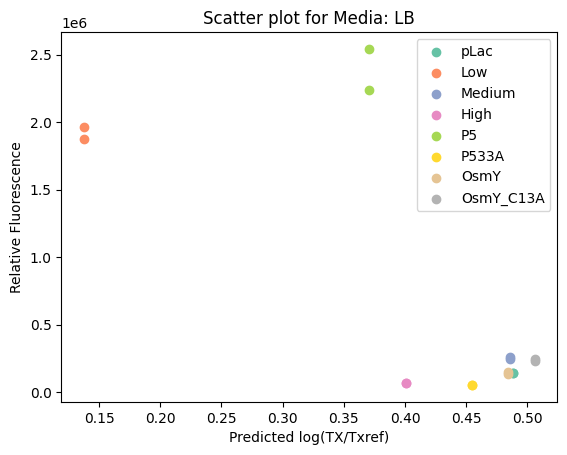

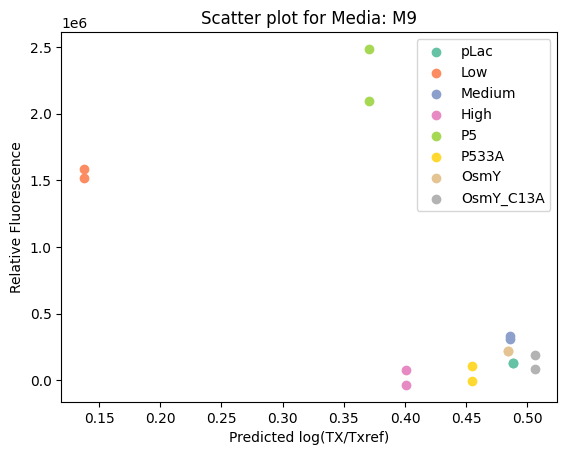

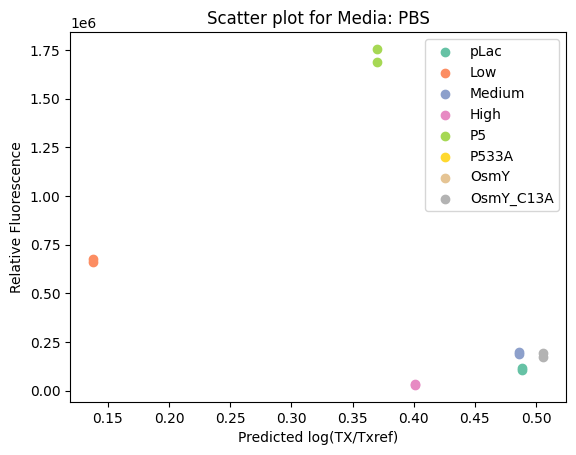

In [319]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


unique_media = comparison_df['Media'].unique()
unique_promoters = comparison_df['Promoter'].unique()

colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

for media in unique_media:
    subset_df_media = comparison_df[comparison_df['Media'] == media]

    plt.figure()

    for i, promoter in enumerate(unique_promoters):
        promoter_subset_df = subset_df_media[subset_df_media['Promoter'] == promoter]
        color = color_map[promoter]
        plt.scatter(promoter_subset_df['Prediction'], promoter_subset_df['Relative Fluorescence'], c=[color], label=promoter)

    plt.xlabel('Predicted log(TX/Txref)')
    plt.ylabel('Relative Fluorescence')
    plt.title(f'Scatter plot for Media: {media}')
    plt.legend()

plt.show()
